<a href="https://colab.research.google.com/github/manjusha-0103/DSML/blob/main/StockPricePredictionWith%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/BE/sem I/ml/miniproject/63MOONS.BO.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,124.250000,124.250000,124.250000,124.250000,90.421135,26400
1,2000-01-04,133.199997,134.149994,115.000000,134.149994,97.625725,56600
2,2000-01-05,123.449997,135.000000,123.449997,129.100006,93.950676,57600
3,2000-01-06,133.000000,139.399994,118.900002,119.800003,87.182724,29100
4,2000-01-07,110.250000,110.250000,110.250000,110.250000,80.232864,6100
...,...,...,...,...,...,...,...
4933,2020-06-01,55.799999,57.400002,55.299999,57.250000,57.250000,21323
4934,2020-06-02,57.400002,59.950001,56.099998,58.950001,58.950001,17834
4935,2020-06-03,59.950001,61.450001,58.250000,58.500000,58.500000,12170
4936,2020-06-04,58.950001,59.000000,57.799999,57.950001,57.950001,4351


In [11]:
df.dropna(how = 'any',inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,124.250000,124.250000,124.250000,124.250000,90.421135,26400
1,2000-01-04,133.199997,134.149994,115.000000,134.149994,97.625725,56600
2,2000-01-05,123.449997,135.000000,123.449997,129.100006,93.950676,57600
3,2000-01-06,133.000000,139.399994,118.900002,119.800003,87.182724,29100
4,2000-01-07,110.250000,110.250000,110.250000,110.250000,80.232864,6100
...,...,...,...,...,...,...,...
4933,2020-06-01,55.799999,57.400002,55.299999,57.250000,57.250000,21323
4934,2020-06-02,57.400002,59.950001,56.099998,58.950001,58.950001,17834
4935,2020-06-03,59.950001,61.450001,58.250000,58.500000,58.500000,12170
4936,2020-06-04,58.950001,59.000000,57.799999,57.950001,57.950001,4351


In [12]:
#df = (df.drop(['Adj Close'],axis = 1))
import datetime 
def date_index(dates):
    dates = dates.split('-')
    year,month,day = int(dates[0]),int(dates[1]),int(dates[2])
    return datetime.datetime(year = year,month = month, day = day)

#date_index_ =  date_index('2000-01-03')

df['Date'] = df['Date'].apply(date_index)

df.shape



(4938, 7)

In [13]:
  
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,124.250000,124.250000,124.250000,124.250000,90.421135,26400
2000-01-04,133.199997,134.149994,115.000000,134.149994,97.625725,56600
2000-01-05,123.449997,135.000000,123.449997,129.100006,93.950676,57600
2000-01-06,133.000000,139.399994,118.900002,119.800003,87.182724,29100
2000-01-07,110.250000,110.250000,110.250000,110.250000,80.232864,6100
...,...,...,...,...,...,...
2020-06-01,55.799999,57.400002,55.299999,57.250000,57.250000,21323
2020-06-02,57.400002,59.950001,56.099998,58.950001,58.950001,17834
2020-06-03,59.950001,61.450001,58.250000,58.500000,58.500000,12170


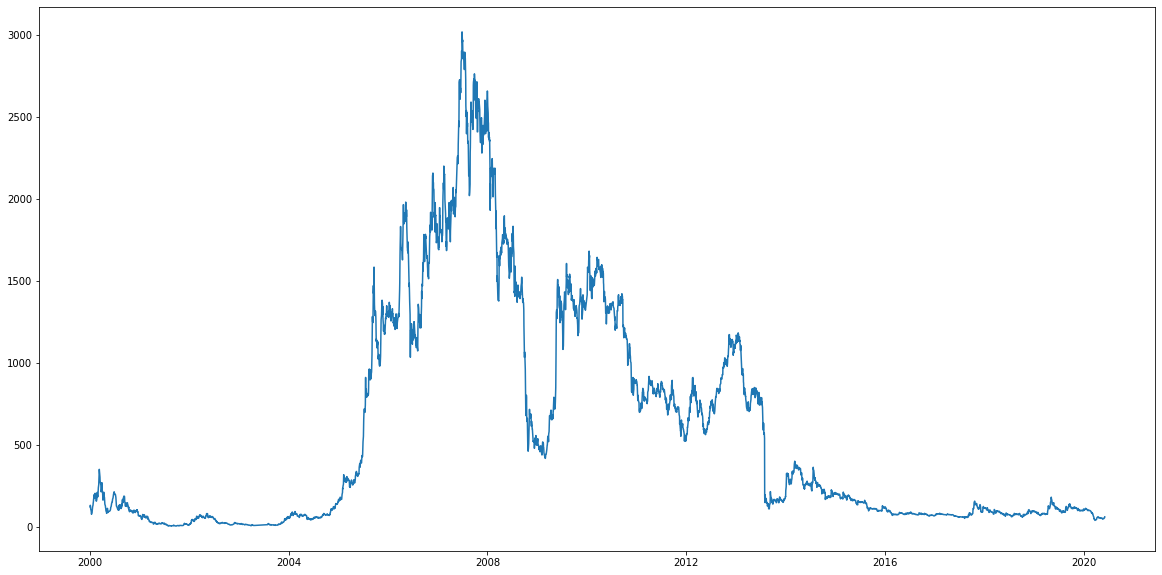

In [14]:
plt.figure(figsize = (20,10))
plt.plot(df.index,df.Close)

In [15]:
row,col = df.shape
ma200 = df.Close.rolling(200).mean()
ma400 = df.Close.rolling(400).mean()

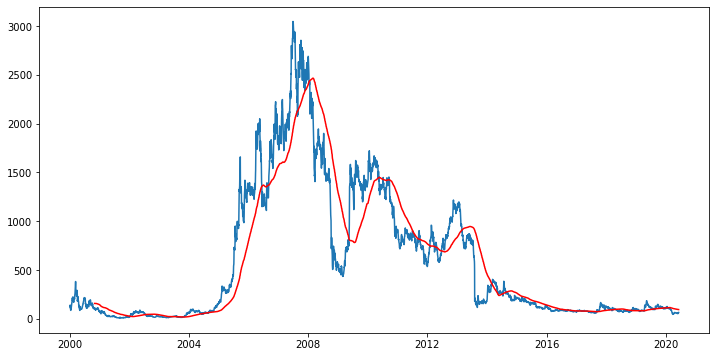

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df['High'])
plt.plot(ma200,'r')

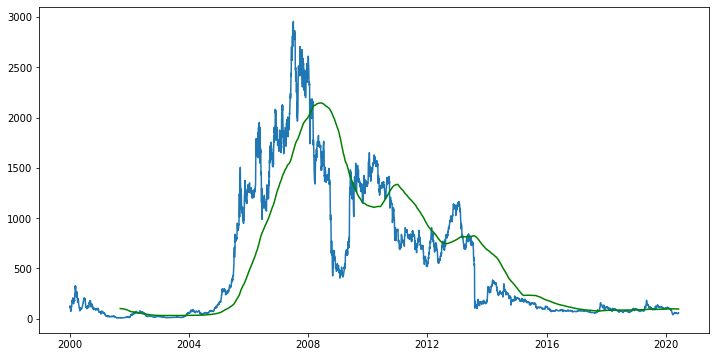

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df['Low'])
plt.plot(ma400,'g')

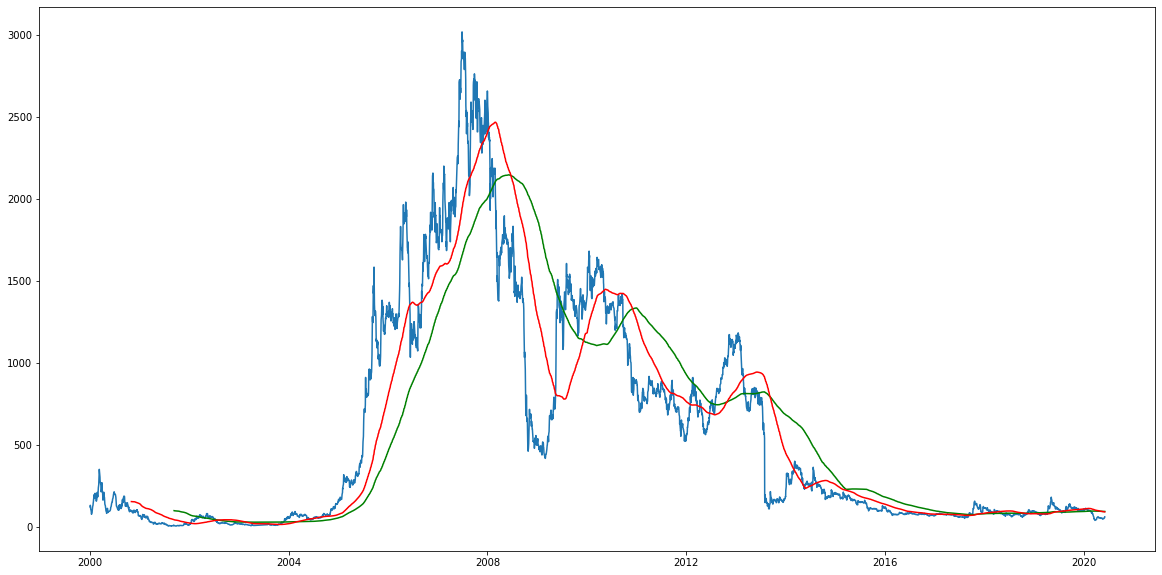

In [18]:
plt.figure(figsize = (20,10))
plt.plot(df['Close'])
plt.plot(ma400,'g')
plt.plot(ma200,'r')

In [19]:
#splittinf the data into training and testing

train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train_data.shape)
print(test_data.shape)

(3456, 1)
(1482, 1)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_tarining_transform = scaler.fit_transform(train_data)
data_tarining_transform

array([[0.03880027],
       [0.04209039],
       [0.0404121 ],
       ...,
       [0.07557328],
       [0.0774676 ],
       [0.07497508]])

In [21]:
x_train = []
y_train = []
for i in range(100,data_tarining_transform.shape[0]):
    x_train.append(data_tarining_transform[i-100:i])
    y_train.append(data_tarining_transform[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(3356, 100, 1)
(3356,)


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

model = Sequential()
#Input layer
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# hideen layer1
model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

# hiden layer 2
model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))


# output layer 
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [24]:
model.compile(optimizer = 'adam',loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
105/105 [==============================] - 39s 312ms/step - loss: 0.0203
Epoch 2/50
105/105 [==============================] - 35s 326ms/step - loss: 0.0050
Epoch 3/50
105/105 [==============================] - 38s 360ms/step - loss: 0.0050
Epoch 4/50
105/105 [==============================] - 33s 313ms/step - loss: 0.0050
Epoch 5/50
105/105 [==============================] - 33s 314ms/step - loss: 0.0042
Epoch 6/50
105/105 [==============================] - 33s 318ms/step - loss: 0.0041
Epoch 7/50
105/105 [==============================] - 34s 319ms/step - loss: 0.0038
Epoch 8/50
105/105 [==============================] - 33s 312ms/step - loss: 0.0032
Epoch 9/50
105/105 [==============================] - 32s 309ms/step - loss: 0.0032
Epoch 10/50
105/105 [==============================] - 33s 312ms/step - loss: 0.0033
Epoch 11/50
105/105 [==============================] - 33s 315ms/step - loss: 0.0030
Epoch 12/50
105/105 [==============================] - 32s 308ms/step - lo

In [54]:
model.save('prediction_with_keras.h5')

In [55]:
test_data

,Close
Date,
2014-05-22,244.750000
2014-05-23,256.950012
2014-05-26,256.899994
2014-05-27,254.899994
2014-05-28,254.750000
...,...
2020-06-01,57.250000
2020-06-02,58.950001
2020-06-03,58.500000


In [56]:
from sre_constants import IN_IGNORE
past_100_data = train_data.tail(100)
final_test_data = past_100_data.append(test_data)
type(final_test_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [57]:
data_testing_transform = scaler.fit_transform(final_test_data)
data_testing_transform

array([[0.36015539],
       [0.36279134],
       [0.35793562],
       ...,
       [0.04495006],
       [0.04342398],
       [0.05937847]])

In [58]:
x_test = []
y_test = []
for i in range(100,data_testing_transform.shape[0]):
    x_test.append(data_testing_transform[i-100:i])
    y_test.append(data_testing_transform[i,0])

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1482, 100, 1)
(1482,)


In [59]:
y_predicted = model.predict(x_test)
y_predicted

47/47 [==============================] - 4s 91ms/step


array([[0.53897804],
       [0.5326381 ],
       [0.53971726],
       ...,
       [0.04820395],
       [0.04903193],
       [0.05008934]], dtype=float32)

In [60]:
print(y_test)
print("........................................................................................................................................................................")
print()
print(y_predicted)

[0.56173694 0.59558825 0.59544946 ... 0.04495006 0.04342398 0.05937847]
........................................................................................................................................................................

[[0.53897804]
 [0.5326381 ]
 [0.53971726]
 ...
 [0.04820395]
 [0.04903193]
 [0.05008934]]


In [61]:
scaler.scale_

array([0.00277469])

In [62]:
scale_factor = 1/0.00277469
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

print(y_test)
print("........................................................................................................................................................................")
print()
print(y_predicted)


[202.4503425  214.6503753  214.60035691 ...  16.20002811  15.65002794
  21.40003765]
........................................................................................................................................................................

[[194.24803 ]
 [191.9631  ]
 [194.51443 ]
 ...
 [ 17.372732]
 [ 17.671139]
 [ 18.05223 ]]


In [80]:
test_data.index = pd.to_datetime(test_data.index)
#test_data.index.isnull().sum()

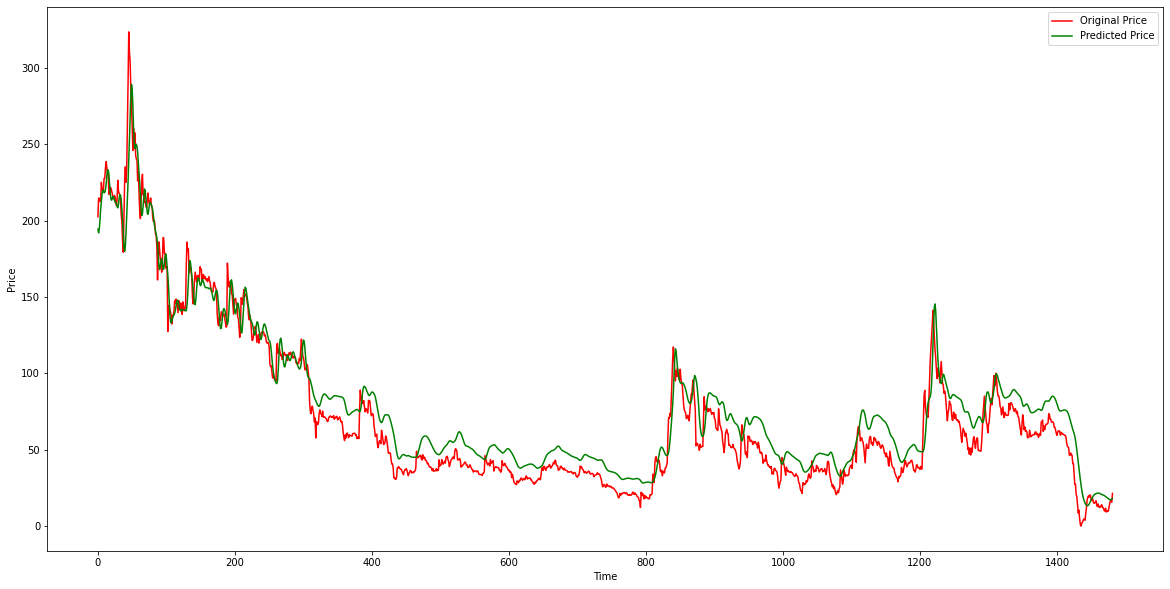

In [82]:
plt.figure(figsize = (20,10))

plt.plot( y_test,'r',label = "Original Price")
plt.plot(y_predicted,'g',label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()